# Digital House - Data Science a Distancia

## Trabajo Práctico 3

### Autores: Daniel Borrino, Ivan Mongi, Jessica Polakoff, Julio Tentor
<p style="text-align:right;">Junio 2022</p>

---

#### Necessary libraries

In [1]:
import pandas as pd
import numpy as np


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
import warnings
warnings.filterwarnings('ignore')


#### Style

In [4]:
sns.set()
plt.style.use('classic')
sns.mpl.rcParams['axes.titlesize'] = 20
sns.mpl.rcParams['axes.labelsize'] = 18


In [5]:
from IPython.display import HTML


---

#### Dataset


Autor: [Islombek Davronov](https://www.kaggle.com/islombekdavronov) - [Credit-scoring data](https://www.kaggle.com/datasets/islombekdavronov/creditscoring-data)

"*The data is collected from the real source and converted to numeric values for better training and classifying the **people who are able or not able to pay** their credits.*"

In [6]:
# levantar el csv de Train
train_data = pd.read_csv('../Data/data_train.csv')

---
#### EDA Functions for this notebook

In [7]:
def basic_EDA(data, trace=False) :
    u'''
    Basic EDA routine for this practice
    '''
    
    if trace :
        print()
        display(HTML('<b>Valores nulos</b>'))
        display(data.isnull().sum())

        print()
        display(HTML('<b>Tipos de datos</b>'))
        display(data.dtypes)
    else :
        if sum(data.isnull().sum()) > 0 :
            raise Exception("ALGO ESTA MAL, HAY VALORES NULOS ...")
    
    # La característica INPS_mln_sum tiene valores enteros, se convierte a ese tipo
    # data['INPS_mln_sum'] = data['INPS_mln_sum'].astype('int64')

    # Características que no aportan a la clasificación
    data.drop(['INPS_mln_sum', 'INPS_yes_no'], axis=1, inplace=True)
    
    # La característica Score_point es del tipo objet y presenta valores no numéricos
    # data['Score_point'] = data['Score_point'].replace({'-' : 0})
    # data['Score_point'] = data['Score_point'].astype('int64')

    # Características que se presumen previamente modelada
    data.drop(['Score_level', 'Score_class', 'Score_point'], axis=1, inplace=True)

    # Características que no aportan a la clasificación
    data.drop(['Month_of_birth', 'Day_of_birth'], axis=1, inplace=True)
    
    # to have more legibility
    data['label_means'] = data['label'].map({0 : 'insolvency', 1 : 'pay credit'})    

    print()
    display(HTML(f'<b>Observaciones {data.shape[0]} Características {data.shape[1]}</b>'))
    display(data.head(5))
    
    print()
    display(HTML('<b>Descripción de las características</b>'))
    display(data.describe())

    return data


In [8]:
def show_some_plots(data, columns, target=None, cols=4) :
    u'''
    Display some countplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to count
        target : binary values to split the count; if None draw a simple countplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    if target != None :
        rows *= 2
    for i, column in enumerate(data[columns]) :
        if target == None :
            plt.subplot(rows, cols, i+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
        else :
            # standar count plot
            plt.subplot(rows, cols, i*2+1)
            sns.countplot(y=data[column])
            plt.tight_layout();
            plt.xlabel(None);
            
            # count by target values
            plt.subplot(rows, cols, i*2+2)
            sns.countplot(data=data, x=column, hue=target)
            plt.tight_layout();
            plt.xlabel(column);
    return

In [9]:
def show_some_hists(data, columns, target=None, cols=4) :
    u'''
    Display some histograms graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show 
        target : binary values to split the count; if None draw a simple histplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    for i, column in enumerate(data[columns]) :
        try :
            plt.subplot(rows, cols, i+1)
            sns.histplot(data=data, x=column, kde=True, hue=target)
            plt.tight_layout();
            plt.xlabel(column);
            plt.ylabel(None);
        except :
            pass
    return

In [10]:
def show_some_boxplots(data, columns, target=None, cols=4) :
    u'''
    Display some boxplots graphs for specific columns in dataset

    args
        data : dataset
        columns : series to show
        target : binary values to split the histogram; if None draw a simple histplot
        cols : number of columns for subplots
    
    Original from Flavio Cavalcante at https://www.kaggle.com/code/flaviocavalcante/simple-eda-to-start
    '''
    
    rows = (len(columns) / cols) + 1
    for i, column in enumerate(data[columns]) :
        plt.subplot(rows, cols, i+1)
        sns.boxplot(data=data, x=target, y=column, palette="RdYlBu")
        plt.tight_layout();
        plt.xlabel(None);
        plt.ylabel(column);
    return

In [11]:
def basic_plots(data) :
    u'''
    Shows counts plots for this practice
    '''
    
    fig = plt.figure(figsize=(25,40));
    fig.suptitle('\nCaracteríscias y su relación con el objetivo\n', 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
    columns = list(data.drop(['label', 'label_means'], axis=1).columns)
    show_some_plots(data=data, columns=columns, target='label_means')
    
    return

In [12]:
def basic_hists(data) :
    u'''
    Shows histograms for this practice
    '''
    
    fig = plt.figure(figsize=(25,25));
    fig.suptitle('\nHistogramas\n', verticalalignment='center', 
                 fontsize='xx-large', fontweight='extra bold')
    columns = list(data.drop(['label', 'label_means'], axis=1).columns)
    show_some_hists(data=data, columns=columns, target='label_means')

    return

In [13]:
def basic_boxplots(data) :
    u'''
    Shows box plots for this practice
    '''
    
    fig = plt.figure(figsize=(25,10));
    fig.suptitle('\nVariación de algunas características según el objetivo (insolvente si o no)\n', 
                 verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
    '''
    columns=['Age', 'Marital', 'Field', 'Region', 
             'Number_of_credits', 'Linked_cards', 
             'Score_level', 'Score_class', 'Score_point', 'Changed_phone_number']
    '''
    columns = list(data.drop(['label', 'label_means'], axis=1).columns)
    show_some_boxplots(data=data, columns=columns, target='label_means', cols=5)

    return

---


In [14]:

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# need for some models
from sklearn.preprocessing import StandardScaler


from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


class Model() :
    u'''
    Practice plain object
    '''
    def __init__(self, name, model, scaler=None) :
        u'''
        Object intializacion
        
        args
            name : text name of model
            model : model instance
            scaler : scaler instance, apply only if not None
        
        '''
    
        self.name = name
        self.model = model
        self.scaler = scaler
        self.isfit = False
        
        self.accuracy = 0
        self.precision = 0
        self.recall = 0
        self.f1 = 0
        self.auc_roc = 0
        
        self.confusion = None
        self.classification_report = None
        return
    

    def train(self, X_data, y_data) :
        u'''
        Train model
        '''
        
        if self.scaler == None :
            self.model.fit(X_data, y_data)
        else :
            self.model.fit(self.scaler.fit_transform(X_data), y_data)
        self.isfit = True
        return
    
    
    def predict(self, X_data, y_data, target_names=None) :
        u'''
        Predict values
        '''
        
        if not self.isfit :
            raise Exception('MODELO NO ENTRENADO ...')
            
        if self.scaler == None :
            y_pred = self.model.predict(X_data)
        else :
            y_pred = self.model.predict(self.scaler.fit_transform(X_data))

        self.accuracy = metrics.accuracy_score(y_data, y_pred)
        self.precision = metrics.precision_score(y_data, y_pred)
        self.recall = metrics.recall_score(y_data, y_pred)
        self.f1 = metrics.f1_score(y_true=y_data, y_pred=y_pred)
        
        fpr, tpr, _ = metrics.roc_curve(y_data, y_pred)
        self.auc_roc = metrics.auc(fpr, tpr)
        
        self.confusion = confusion_matrix(y_data, y_pred)
        self.classification_report = classification_report(y_data, y_pred, 
                                                           digits=6, 
                                                           target_names=target_names, 
                                                           output_dict=False)
        return y_pred


In [15]:
def show_metrics(models, show_classification_report=False) :
    u'''
    
    '''
    df = pd.DataFrame()
    for m in models :
        df = pd.concat([df, 
                        pd.DataFrame(columns=[['Modelo', 'Accuracy', 'Precision', 'Recall', 'f1', 'AUC-ROC']], 
                                     data=[[ m.name, m.accuracy, m.precision, m.recall, m.f1, m.auc_roc ]])], 
                       axis=0, ignore_index=True)
    display(df)

    if show_classification_report :
        for m in models :
            display(HTML('<b>' + m.name + '</b>'))
            print(m.classification_report)
    
    return

In [16]:
def show_confusion_matrix(models, cols=4) :
    u'''
    Display some confusion matrix graphs

    args
        models : list ob models objects
        cols : number of columns for the subplot; default is 4
    
    '''
    
    rows = (len(models) / cols) + 1
    
    for i, m in enumerate(models) :
        plt.subplot(rows, cols, i+1)
        sns.heatmap(pd.DataFrame(data=m.confusion, 
                                 index=['Actual Insolvency', 'Actual Pay credit'],
                                 columns=['Predict Insolvency', 'Predict Pay credit'] ), 
                    annot=True, center=0, fmt='d', cmap='YlGnBu')
        plt.tight_layout();
        plt.title(m.name);
        plt.ylabel(None)
        plt.xlabel(None)
        
    return

In [17]:
def show_roc_curve(models, X_data, y_data) :
    u'''
    Display some roc curves matrix graphs

    args
        models : list ob models objects
        X_data : 2D array with features
        y_data : 1D array with targets
    
    '''
    
    plt.tight_layout();
    plt.axis([0, 1.01, 0, 1.05])
    plt.ylabel('TPR / Sensitivity (Recall)')
    plt.xlabel('1 - Specificty')
    
    legend = []
    
    for i, m in enumerate(models) :
        
        if m.scaler == None :
            y_pred = m.model.predict_proba(X_data)
        else :
            y_pred = m.model.predict_proba(m.scaler.fit_transform(X_data))
        
        fpr, tpr, _ = metrics.roc_curve(y_data, y_pred[:, 1])

        legend.append(m.name)
        
        plt.plot(fpr, tpr)

    plt.plot(np.arange(0, 1, step=0.01), np.arange(0, 1, step=0.01), linestyle='-.' )
    plt.legend(legend, loc='lower right');
    return

---
#### Exploratory Data Analysis

In [18]:
train_data = basic_EDA(train_data)

,label,Age,Language,Sex,Marital,Has_Credit,Field,Region,Number_of_credits,Linked_cards,Changed_phone_number,label_means
0,0,34,1,2,6,2,13,12,1,0,1,insolvency
1,0,38,1,1,5,1,10,13,1,2,1,insolvency
2,0,35,1,2,4,2,9,13,4,1,1,insolvency
3,0,27,1,1,5,2,13,12,1,2,1,insolvency
4,0,32,1,2,4,2,10,13,3,1,1,insolvency


,label,Age,Language,Sex,Marital,Has_Credit,Field,Region,Number_of_credits,Linked_cards,Changed_phone_number
count,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000,8707.000000
mean,0.923050,37.690479,1.147468,1.622488,4.540829,1.032043,10.485012,11.207190,1.119789,1.100838,0.112094
std,0.266527,10.750031,0.354592,0.484792,1.053161,0.176125,5.597442,3.020191,0.366915,0.315294,0.344394
min,0.000000,19.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,1.000000,29.000000,1.000000,1.000000,4.000000,1.000000,6.000000,12.000000,1.000000,1.000000,0.000000
50%,1.000000,36.000000,1.000000,2.000000,4.000000,1.000000,13.000000,12.000000,1.000000,1.000000,0.000000
75%,1.000000,44.000000,1.000000,2.000000,5.000000,1.000000,14.000000,13.000000,1.000000,1.000000,0.000000
max,1.000000,79.000000,2.000000,2.000000,7.000000,2.000000,22.000000,14.000000,5.000000,4.000000,3.000000


---
#### Some graphs

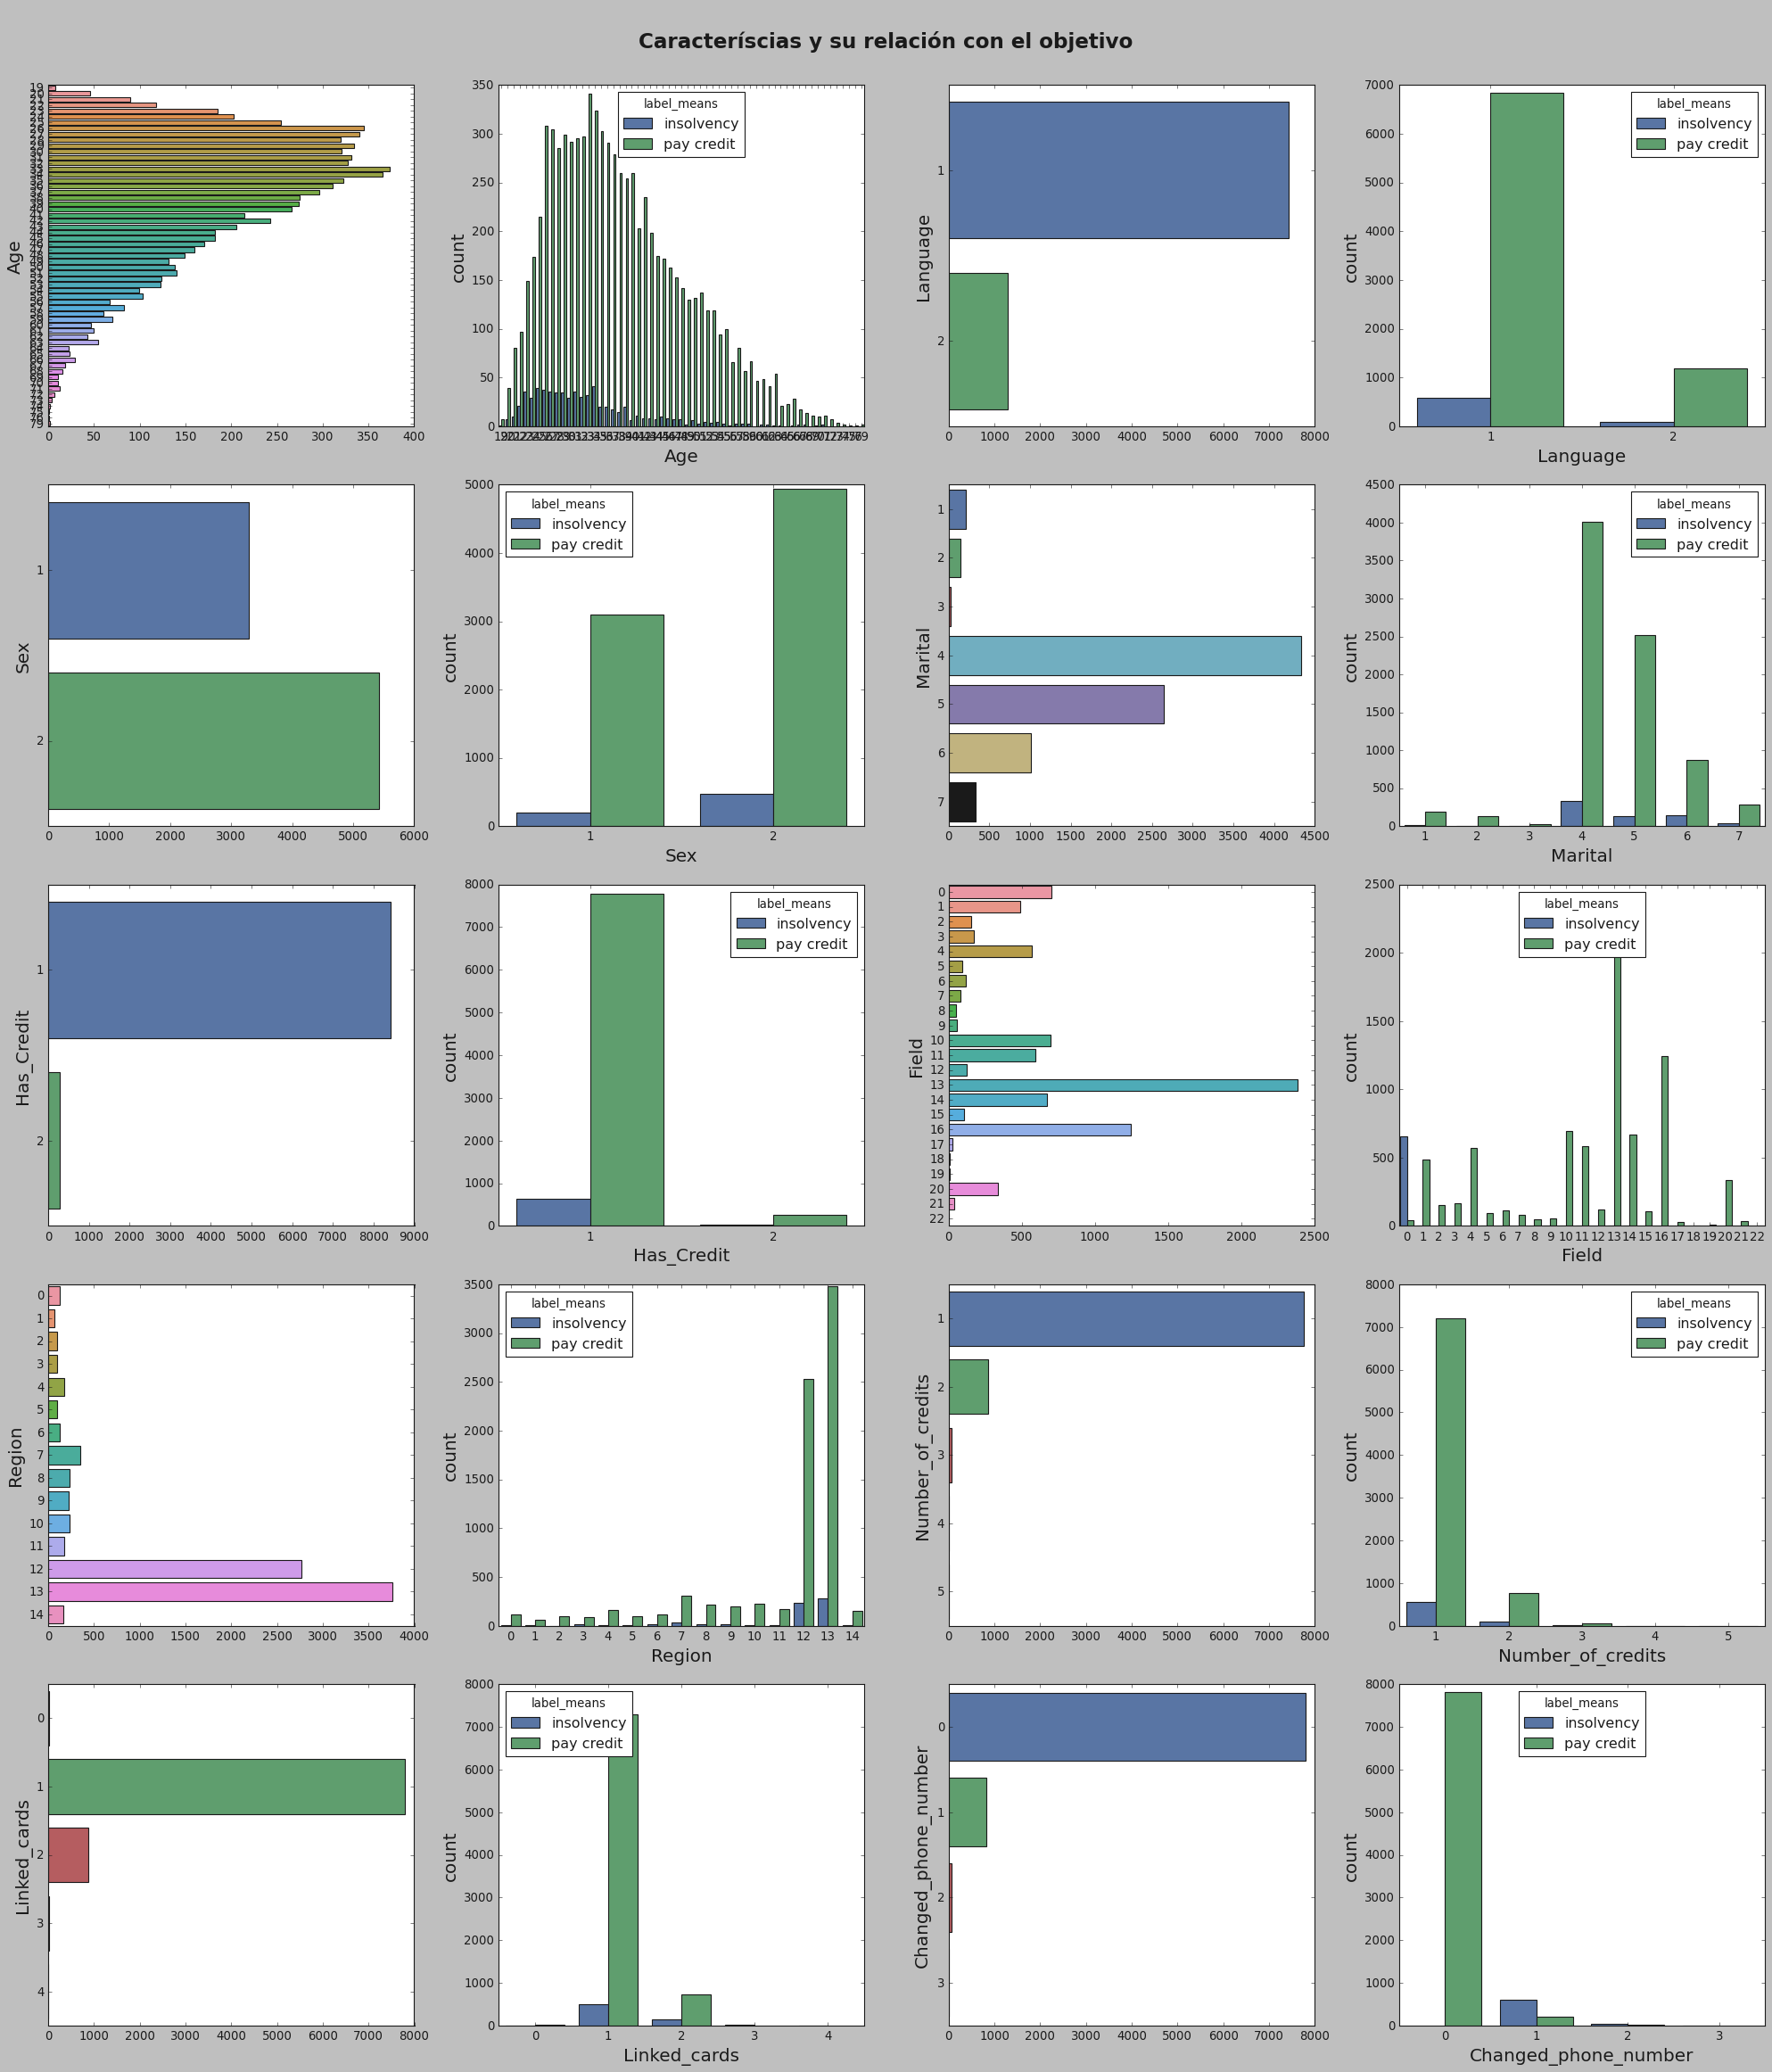

In [19]:
# comentar para saltarse los gráficos

basic_plots(train_data)

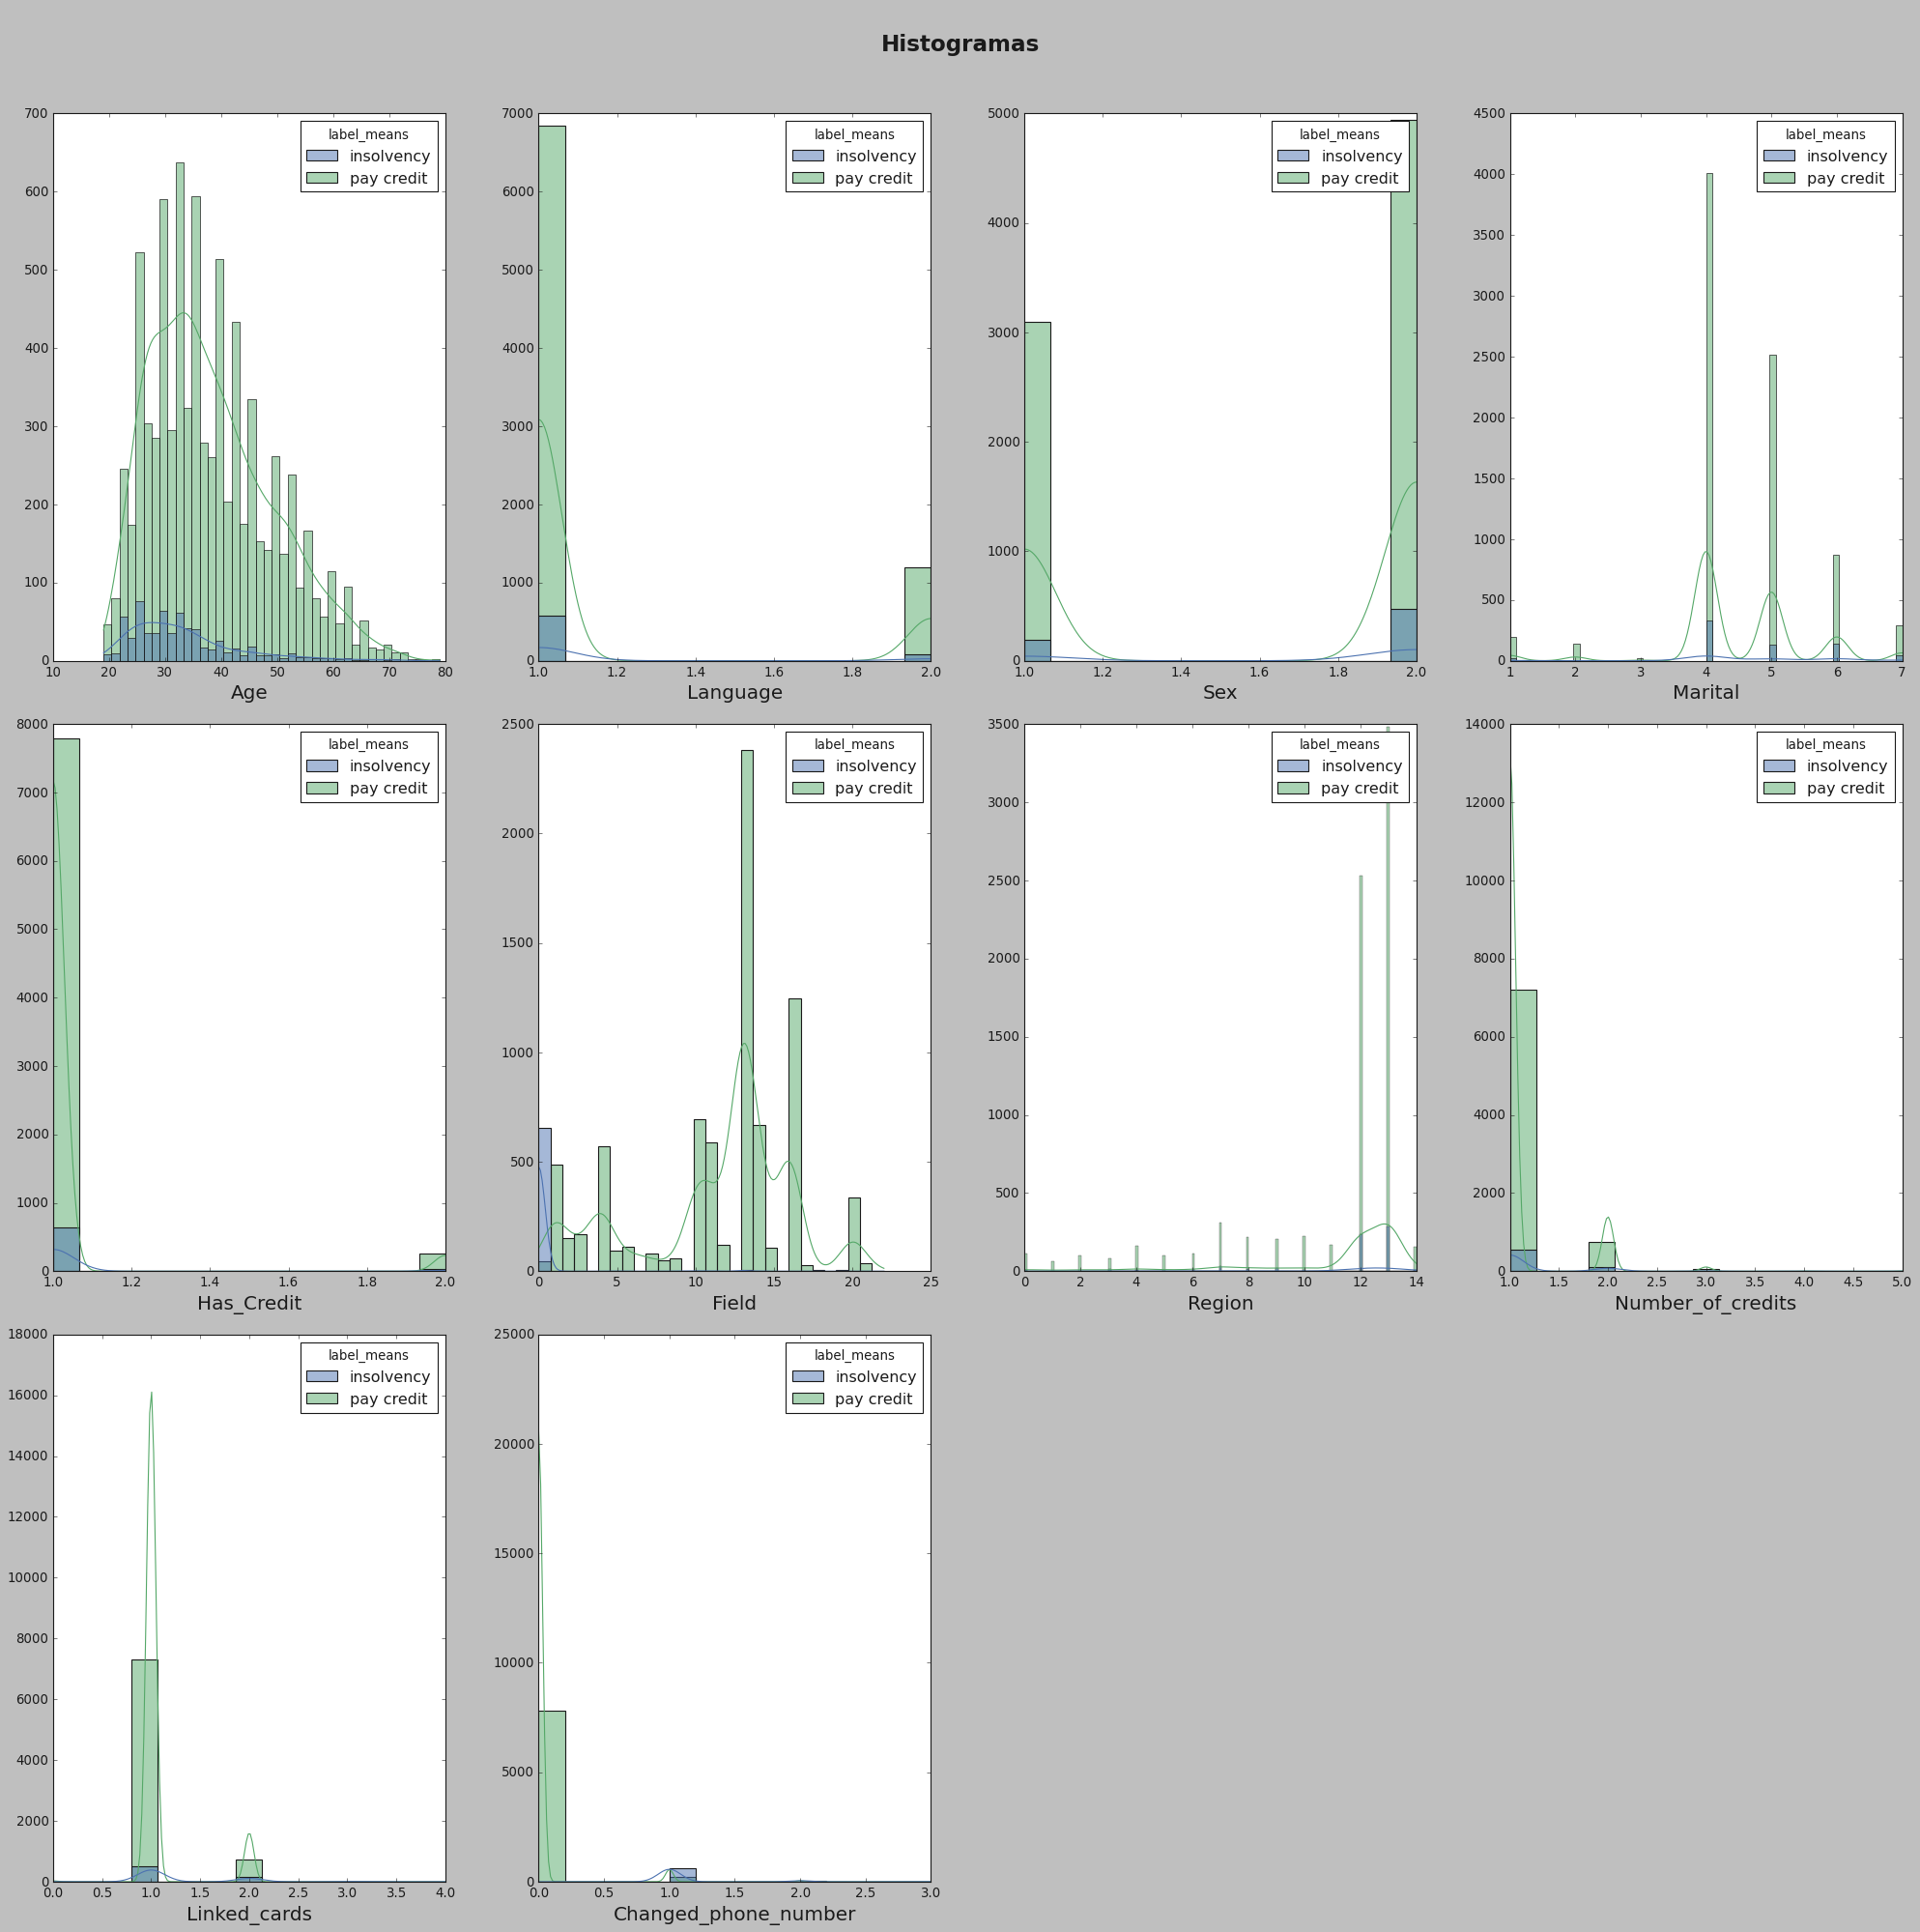

In [20]:
basic_hists(train_data)

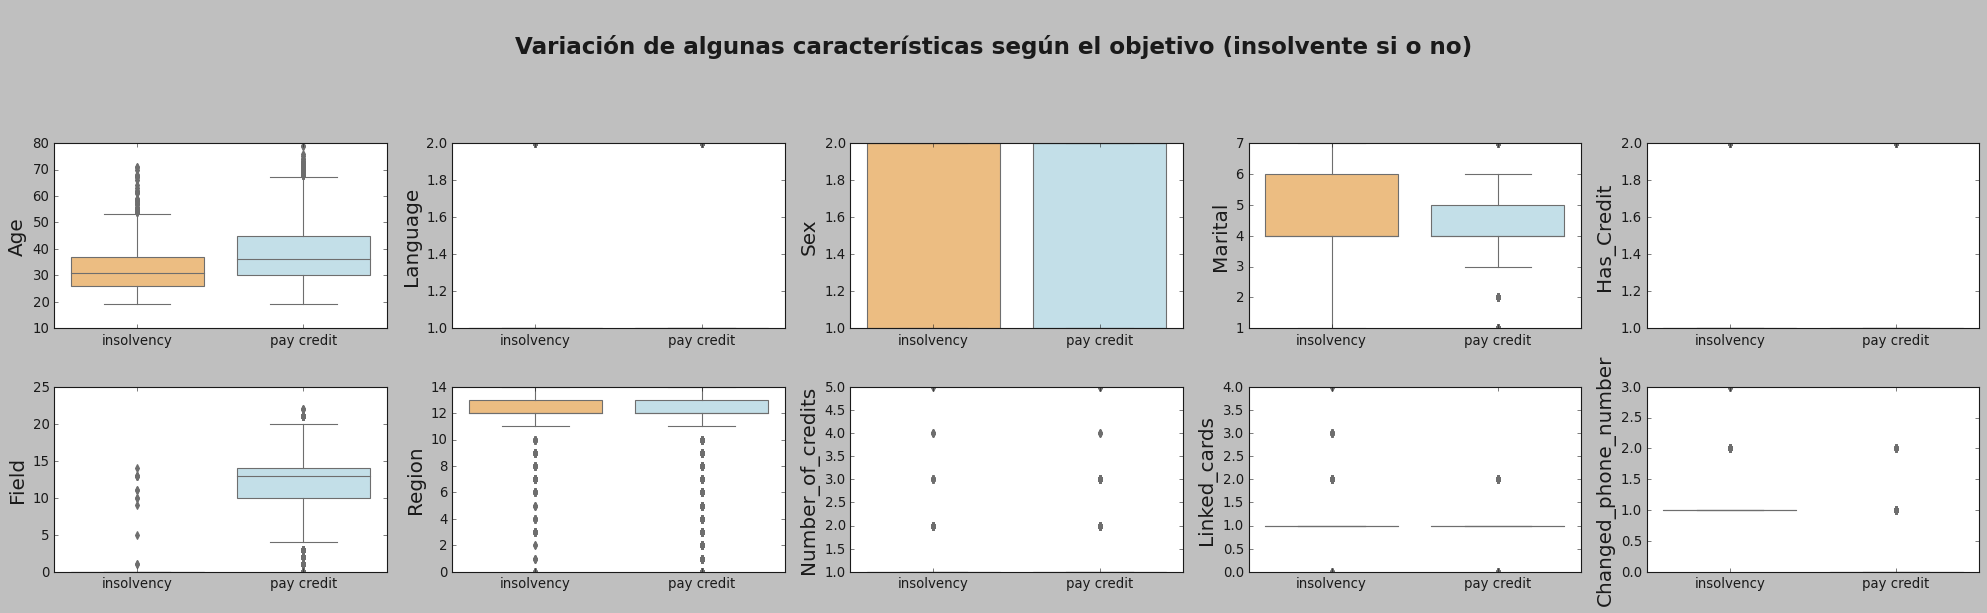

In [21]:
basic_boxplots(train_data)

---
#### Split data for train and test

In [22]:

from sklearn.model_selection import train_test_split


X = train_data.drop(['label', 'label_means'], axis=1)
y = train_data['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test :", y_test.shape)

X_train: (5833, 10)
y_train: (5833,)
X_test:  (2874, 10)
y_test : (2874,)


---
#### Evaluate some models

In [23]:
# definir los modelos a entrenar
models = []

models.append( Model(name='Naive Bayes Gaussiano', model=GaussianNB()  ) )
models.append( Model(name='Regresión Logística', model=LogisticRegression() ) )
models.append( Model(name='k-vecinos más Cercanos', model=KNeighborsClassifier(), scaler=StandardScaler() ) )
models.append( Model(name='Vectores de Soporte', model=SVC(probability=True) ) )


In [24]:
# entrenar los modelos, predecir y capturar los resultados
for m in models :
    m.train(X_train, y_train)
    m.predict(X_test, y_test, target_names=['Insolvency', 'Pay credit'])


---
#### Presentar los resultados

In [25]:
show_metrics(models, show_classification_report=True)

,Modelo,Accuracy,Precision,Recall,f1,AUC-ROC
0,Naive Bayes Gaussiano,0.993041,0.999243,0.993231,0.996228,0.991964
1,Regresión Logística,0.996868,0.998870,0.997744,0.998307,0.991895
2,k-vecinos más Cercanos,0.992693,0.997736,0.994359,0.996044,0.983226
3,Vectores de Soporte,0.991997,0.995862,0.995487,0.995674,0.972162


              precision    recall  f1-score   support

  Insolvency   0.922078  0.990698  0.955157       215
  Pay credit   0.999243  0.993231  0.996228      2659

    accuracy                       0.993041      2874
   macro avg   0.960661  0.991964  0.975692      2874
weighted avg   0.993471  0.993041  0.993155      2874



              precision    recall  f1-score   support

  Insolvency   0.972477  0.986047  0.979215       215
  Pay credit   0.998870  0.997744  0.998307      2659

    accuracy                       0.996868      2874
   macro avg   0.985674  0.991895  0.988761      2874
weighted avg   0.996896  0.996868  0.996878      2874



              precision    recall  f1-score   support

  Insolvency   0.933036  0.972093  0.952164       215
  Pay credit   0.997736  0.994359  0.996044      2659

    accuracy                       0.992693      2874
   macro avg   0.965386  0.983226  0.974104      2874
weighted avg   0.992896  0.992693  0.992762      2874



              precision    recall  f1-score   support

  Insolvency   0.944444  0.948837  0.946636       215
  Pay credit   0.995862  0.995487  0.995674      2659

    accuracy                       0.991997      2874
   macro avg   0.970153  0.972162  0.971155      2874
weighted avg   0.992015  0.991997  0.992006      2874



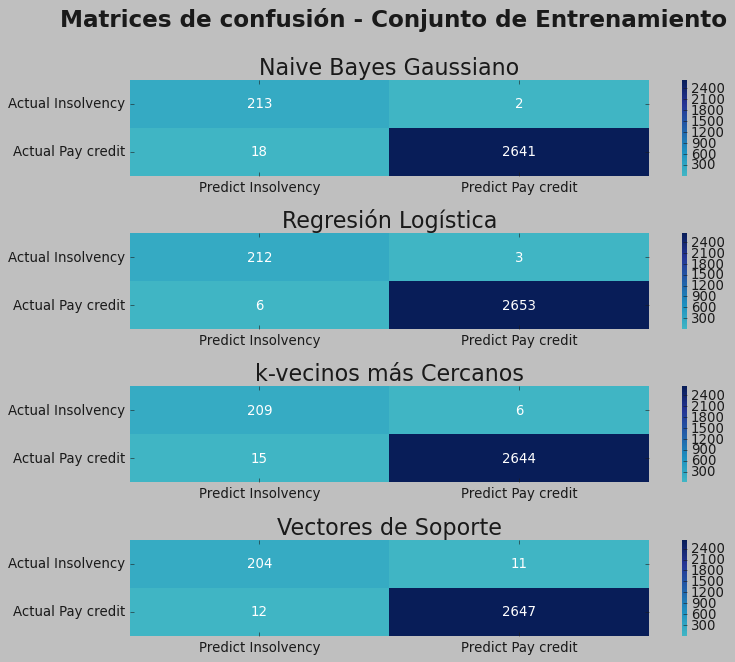

In [26]:
fig = plt.figure(figsize=(10, 10));
fig.suptitle('Matrices de confusión - Conjunto de Entrenamiento', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_confusion_matrix(models, 1)

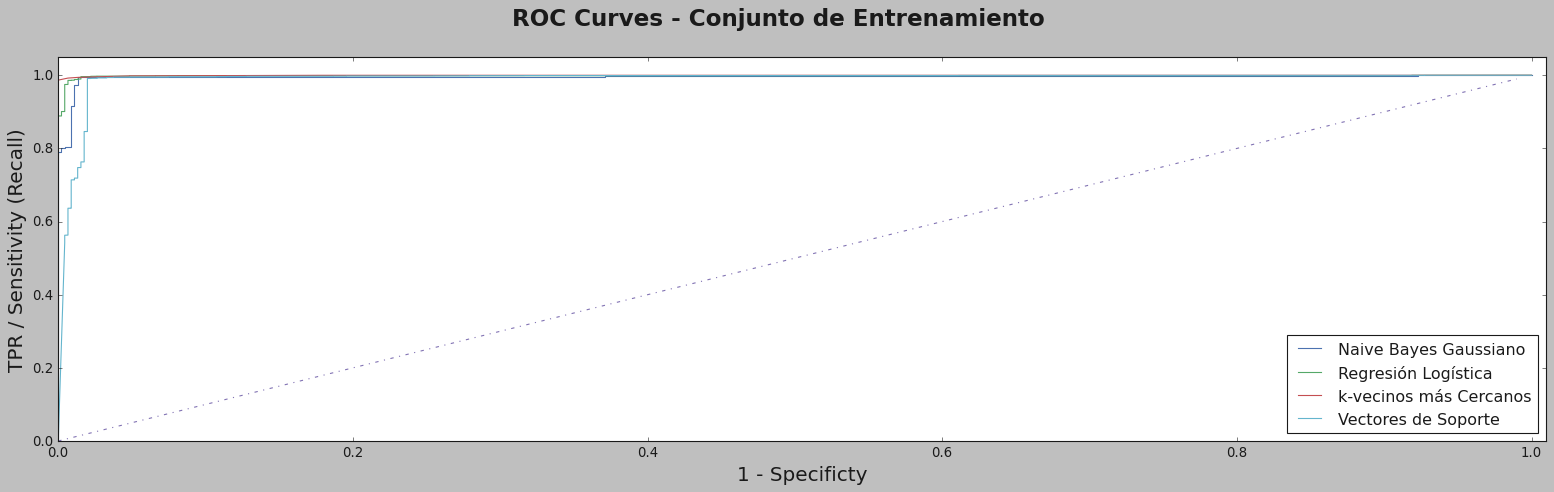

In [27]:
fig = plt.figure(figsize=(24, 6));
fig.suptitle('ROC Curves - Conjunto de Entrenamiento', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_roc_curve(models, X_train, y_train)

---
## Conclusiones

### El modelo de Regresión Logística es preferible al Naive Bayes Gaussiano porque predice menos falsos negativos

Naive Bayes Gaussiano no predice falsos positivos, sin embargo el negocio pierde de cobrar intereses por la mayor cantidad de falsos negativos que predice


---
### Predecir con el conjunto de Test provisto por Kaggle


In [28]:
# levantando el csv de Test
test_data = pd.read_csv('../Data/data_test.csv')

In [29]:
# EDA para el conjunto de Test
test_data = basic_EDA(test_data)

,label,Age,Language,Sex,Marital,Has_Credit,Field,Region,Number_of_credits,Linked_cards,Changed_phone_number,label_means
0,0,40,1,2,4,1,0,12,2,1,1,insolvency
1,0,36,2,2,4,1,0,13,1,2,1,insolvency
2,0,31,1,2,4,1,0,13,1,1,2,insolvency
3,0,29,1,2,4,1,0,13,1,1,1,insolvency
4,0,38,1,2,4,1,0,13,1,2,1,insolvency


,label,Age,Language,Sex,Marital,Has_Credit,Field,Region,Number_of_credits,Linked_cards,Changed_phone_number
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.0,48.000000,48.00000,48.000000,48.000000,48.000000
mean,0.458333,38.229167,1.125000,1.666667,4.604167,1.0,4.375000,12.50000,1.229167,1.333333,0.604167
std,0.503534,11.143626,0.334219,0.476393,1.215845,0.0,6.125027,0.71459,0.424744,0.519137,0.573885
min,0.000000,22.000000,1.000000,1.000000,1.000000,1.0,0.000000,10.00000,1.000000,1.000000,0.000000
25%,0.000000,30.500000,1.000000,1.000000,4.000000,1.0,0.000000,12.00000,1.000000,1.000000,0.000000
50%,0.000000,35.000000,1.000000,2.000000,4.000000,1.0,0.000000,13.00000,1.000000,1.000000,1.000000
75%,1.000000,44.750000,1.000000,2.000000,5.250000,1.0,10.000000,13.00000,1.000000,2.000000,1.000000
max,1.000000,69.000000,2.000000,2.000000,7.000000,1.0,20.000000,13.00000,2.000000,3.000000,2.000000


In [30]:
# comentar para saltarse los gráficos

# basic_plots(test_data)

In [31]:
# basic_hists(test_data)

In [32]:
# basic_boxplots(test_data)

In [33]:

test_X = test_data.drop(['label', 'label_means'], axis=1)
test_y = test_data['label']

print("test_X: ", test_X.shape)
print("test_y :", test_y.shape)

test_X:  (48, 10)
test_y : (48,)


In [34]:
# predecir y capturar los resultados sobre el conjunto de Test
for m in models :
    m.predict(test_X, test_y, target_names=['Insolvency', 'Pay credit'])
            

In [35]:
show_metrics(models, show_classification_report=True)

,Modelo,Accuracy,Precision,Recall,f1,AUC-ROC
0,Naive Bayes Gaussiano,1.000000,1.000000,1.0,1.000000,1.000000
1,Regresión Logística,1.000000,1.000000,1.0,1.000000,1.000000
2,k-vecinos más Cercanos,0.479167,0.468085,1.0,0.637681,0.519231
3,Vectores de Soporte,1.000000,1.000000,1.0,1.000000,1.000000


              precision    recall  f1-score   support

  Insolvency   1.000000  1.000000  1.000000        26
  Pay credit   1.000000  1.000000  1.000000        22

    accuracy                       1.000000        48
   macro avg   1.000000  1.000000  1.000000        48
weighted avg   1.000000  1.000000  1.000000        48



              precision    recall  f1-score   support

  Insolvency   1.000000  1.000000  1.000000        26
  Pay credit   1.000000  1.000000  1.000000        22

    accuracy                       1.000000        48
   macro avg   1.000000  1.000000  1.000000        48
weighted avg   1.000000  1.000000  1.000000        48



              precision    recall  f1-score   support

  Insolvency   1.000000  0.038462  0.074074        26
  Pay credit   0.468085  1.000000  0.637681        22

    accuracy                       0.479167        48
   macro avg   0.734043  0.519231  0.355878        48
weighted avg   0.756206  0.479167  0.332394        48



              precision    recall  f1-score   support

  Insolvency   1.000000  1.000000  1.000000        26
  Pay credit   1.000000  1.000000  1.000000        22

    accuracy                       1.000000        48
   macro avg   1.000000  1.000000  1.000000        48
weighted avg   1.000000  1.000000  1.000000        48



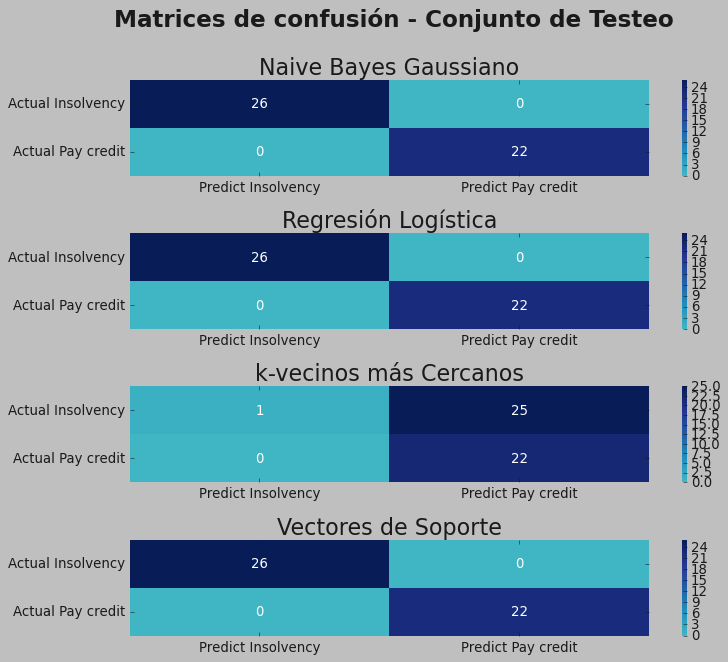

In [36]:
fig = plt.figure(figsize=(10, 10));
fig.suptitle('Matrices de confusión - Conjunto de Testeo', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_confusion_matrix(models, 1)


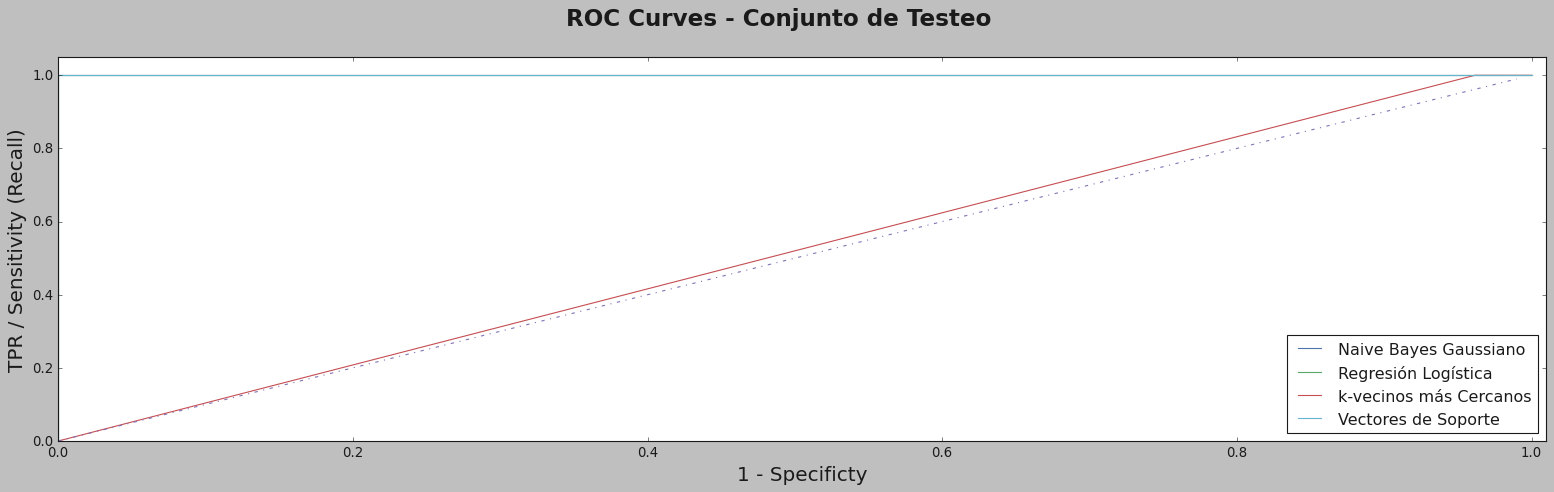

In [37]:
fig = plt.figure(figsize=(24, 6));
fig.suptitle('ROC Curves - Conjunto de Testeo', 
             verticalalignment='center', fontsize='xx-large', fontweight='extra bold')
show_roc_curve(models, test_X, test_y)

---